In [1]:
#import libraries needed
import pandas as pd
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew, probplot
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report, f1_score, precision_score, recall_score)
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import ADASYN, SMOTE, BorderlineSMOTE, RandomOverSampler
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix

Section 1:
Data Importing and Pre-processing

In [3]:
# read in file
wine_df = pd.read_csv('WineQT.csv')

In [4]:
# check number of rows and columns
wine_df.shape

(1143, 13)

In [5]:
wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [6]:
# check the column names
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [7]:
# missing data
total = wine_df.isnull().sum().sort_values(ascending=False)
percent = (wine_df.isnull().sum()/wine_df.isnull().count()).sort_values()
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(13)

Total  Percent
fixed acidity             0      0.0
volatile acidity          0      0.0
citric acid               0      0.0
residual sugar            0      0.0
chlorides                 0      0.0
free sulfur dioxide       0      0.0
total sulfur dioxide      0      0.0
density                   0      0.0
pH                        0      0.0
sulphates                 0      0.0
alcohol                   0      0.0
quality                   0      0.0
Id                        0      0.0

In [8]:
# Aggregation
wine_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

In [9]:
# Drop ID column
wine_df = wine_df.drop('Id', axis=1)
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
# Feature construction
# add features (chosen based on kaggle discussions)
wine_df['alcohol_density'] = wine_df['alcohol']  * wine_df['density']
wine_df['alcohol_to_density'] = wine_df['alcohol'] / wine_df['density']
wine_df['sulphate/density'] = wine_df['sulphates']  / wine_df['density']

wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  alcohol_density  alcohol_to_density  sulphate/density  
0      9.4        5          9.37932            9.420726          0.561235  
1      9.8        5          9.76864            9.831461          0.682183  
2      9.8        5          9.77060            9.829488          0.651956  
3      9.8        6          9.78040            9.819639          0.581162  
4      9.4        5          9.37932            9.420726          0.561235

Section 2:
Data Analysis and Visualization

In [12]:
# Identify categorical, ordinal, and numerical variables within data
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
alcohol_density         float64
alcohol_to_density      float64
sulphate/density        float64
dtype: object

All columns are continuous except Quality (our target) which is ordinal

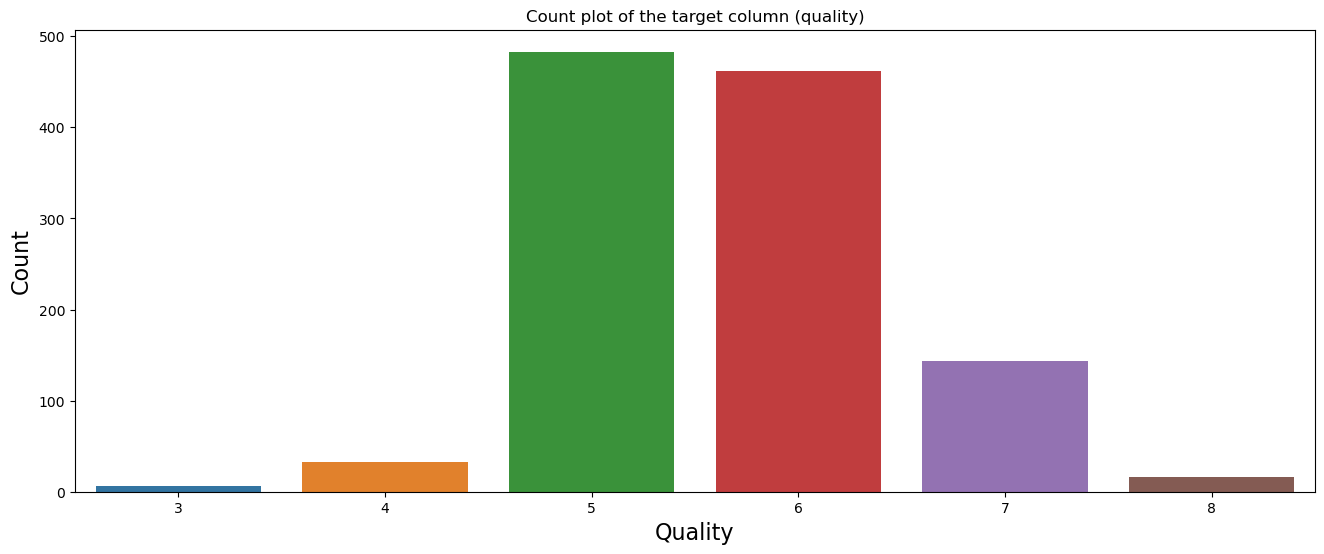

In [14]:
#Checking the distribution of the target column (quality)
plt.figure(figsize=(16,6))
sns.countplot(x=wine_df['quality'])
plt.title('Count plot of the target column (quality)')
plt.xlabel('Quality',fontsize=16,c='k')
plt.ylabel('Count',fontsize=16,c='k')
plt.show()

Target is imbalanced, we fix this later on

In [16]:
# Correlation between the features and target
wine_df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol_density         0.486064
alcohol                 0.484866
alcohol_to_density      0.483552
sulphate/density        0.259448
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64

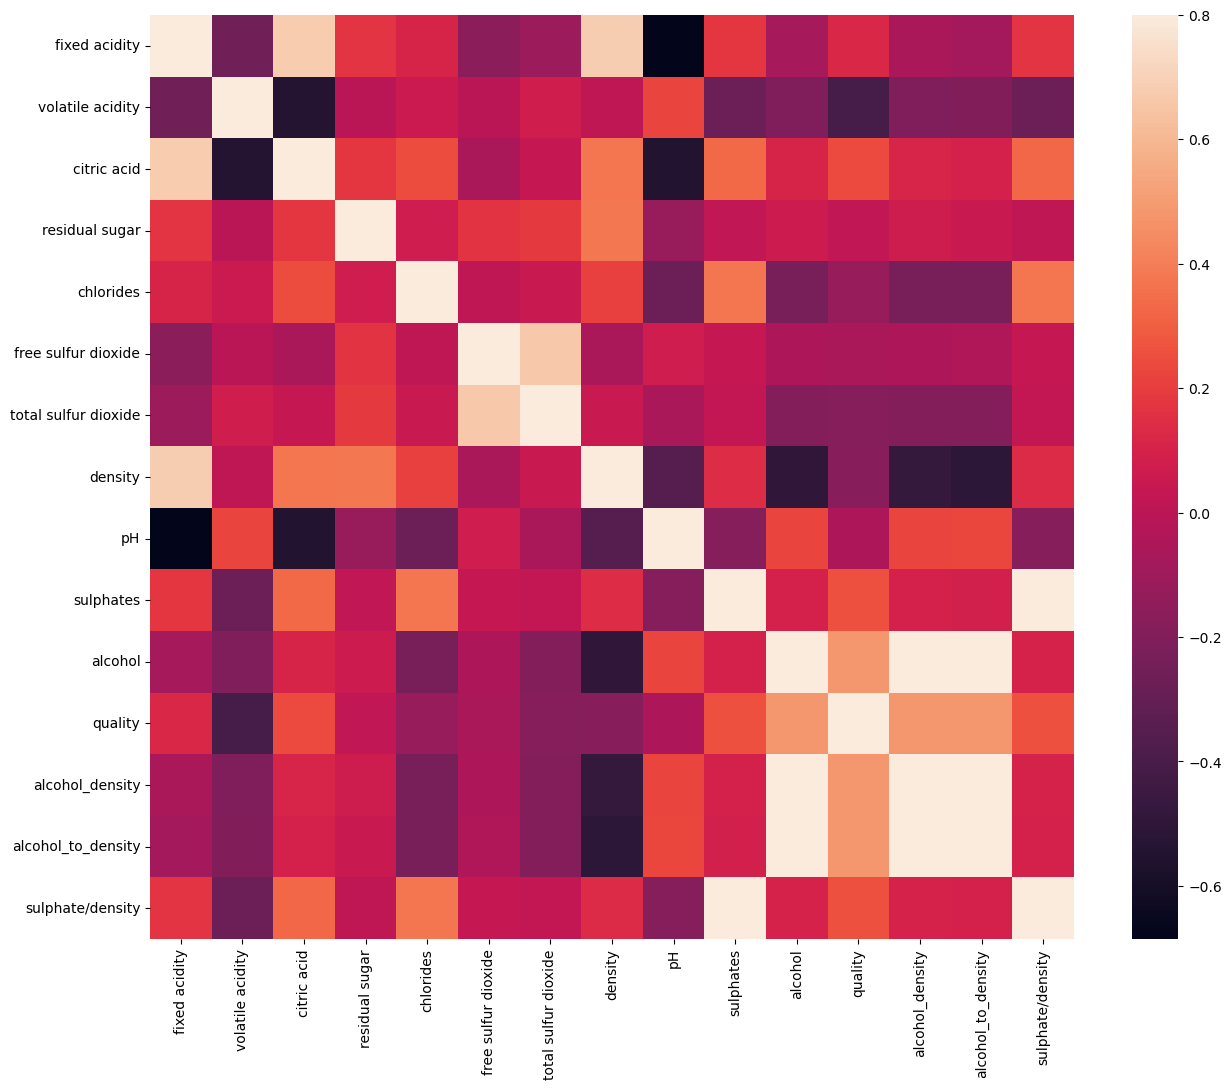

In [17]:
# Correlation map to visualize
corrmat = wine_df.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

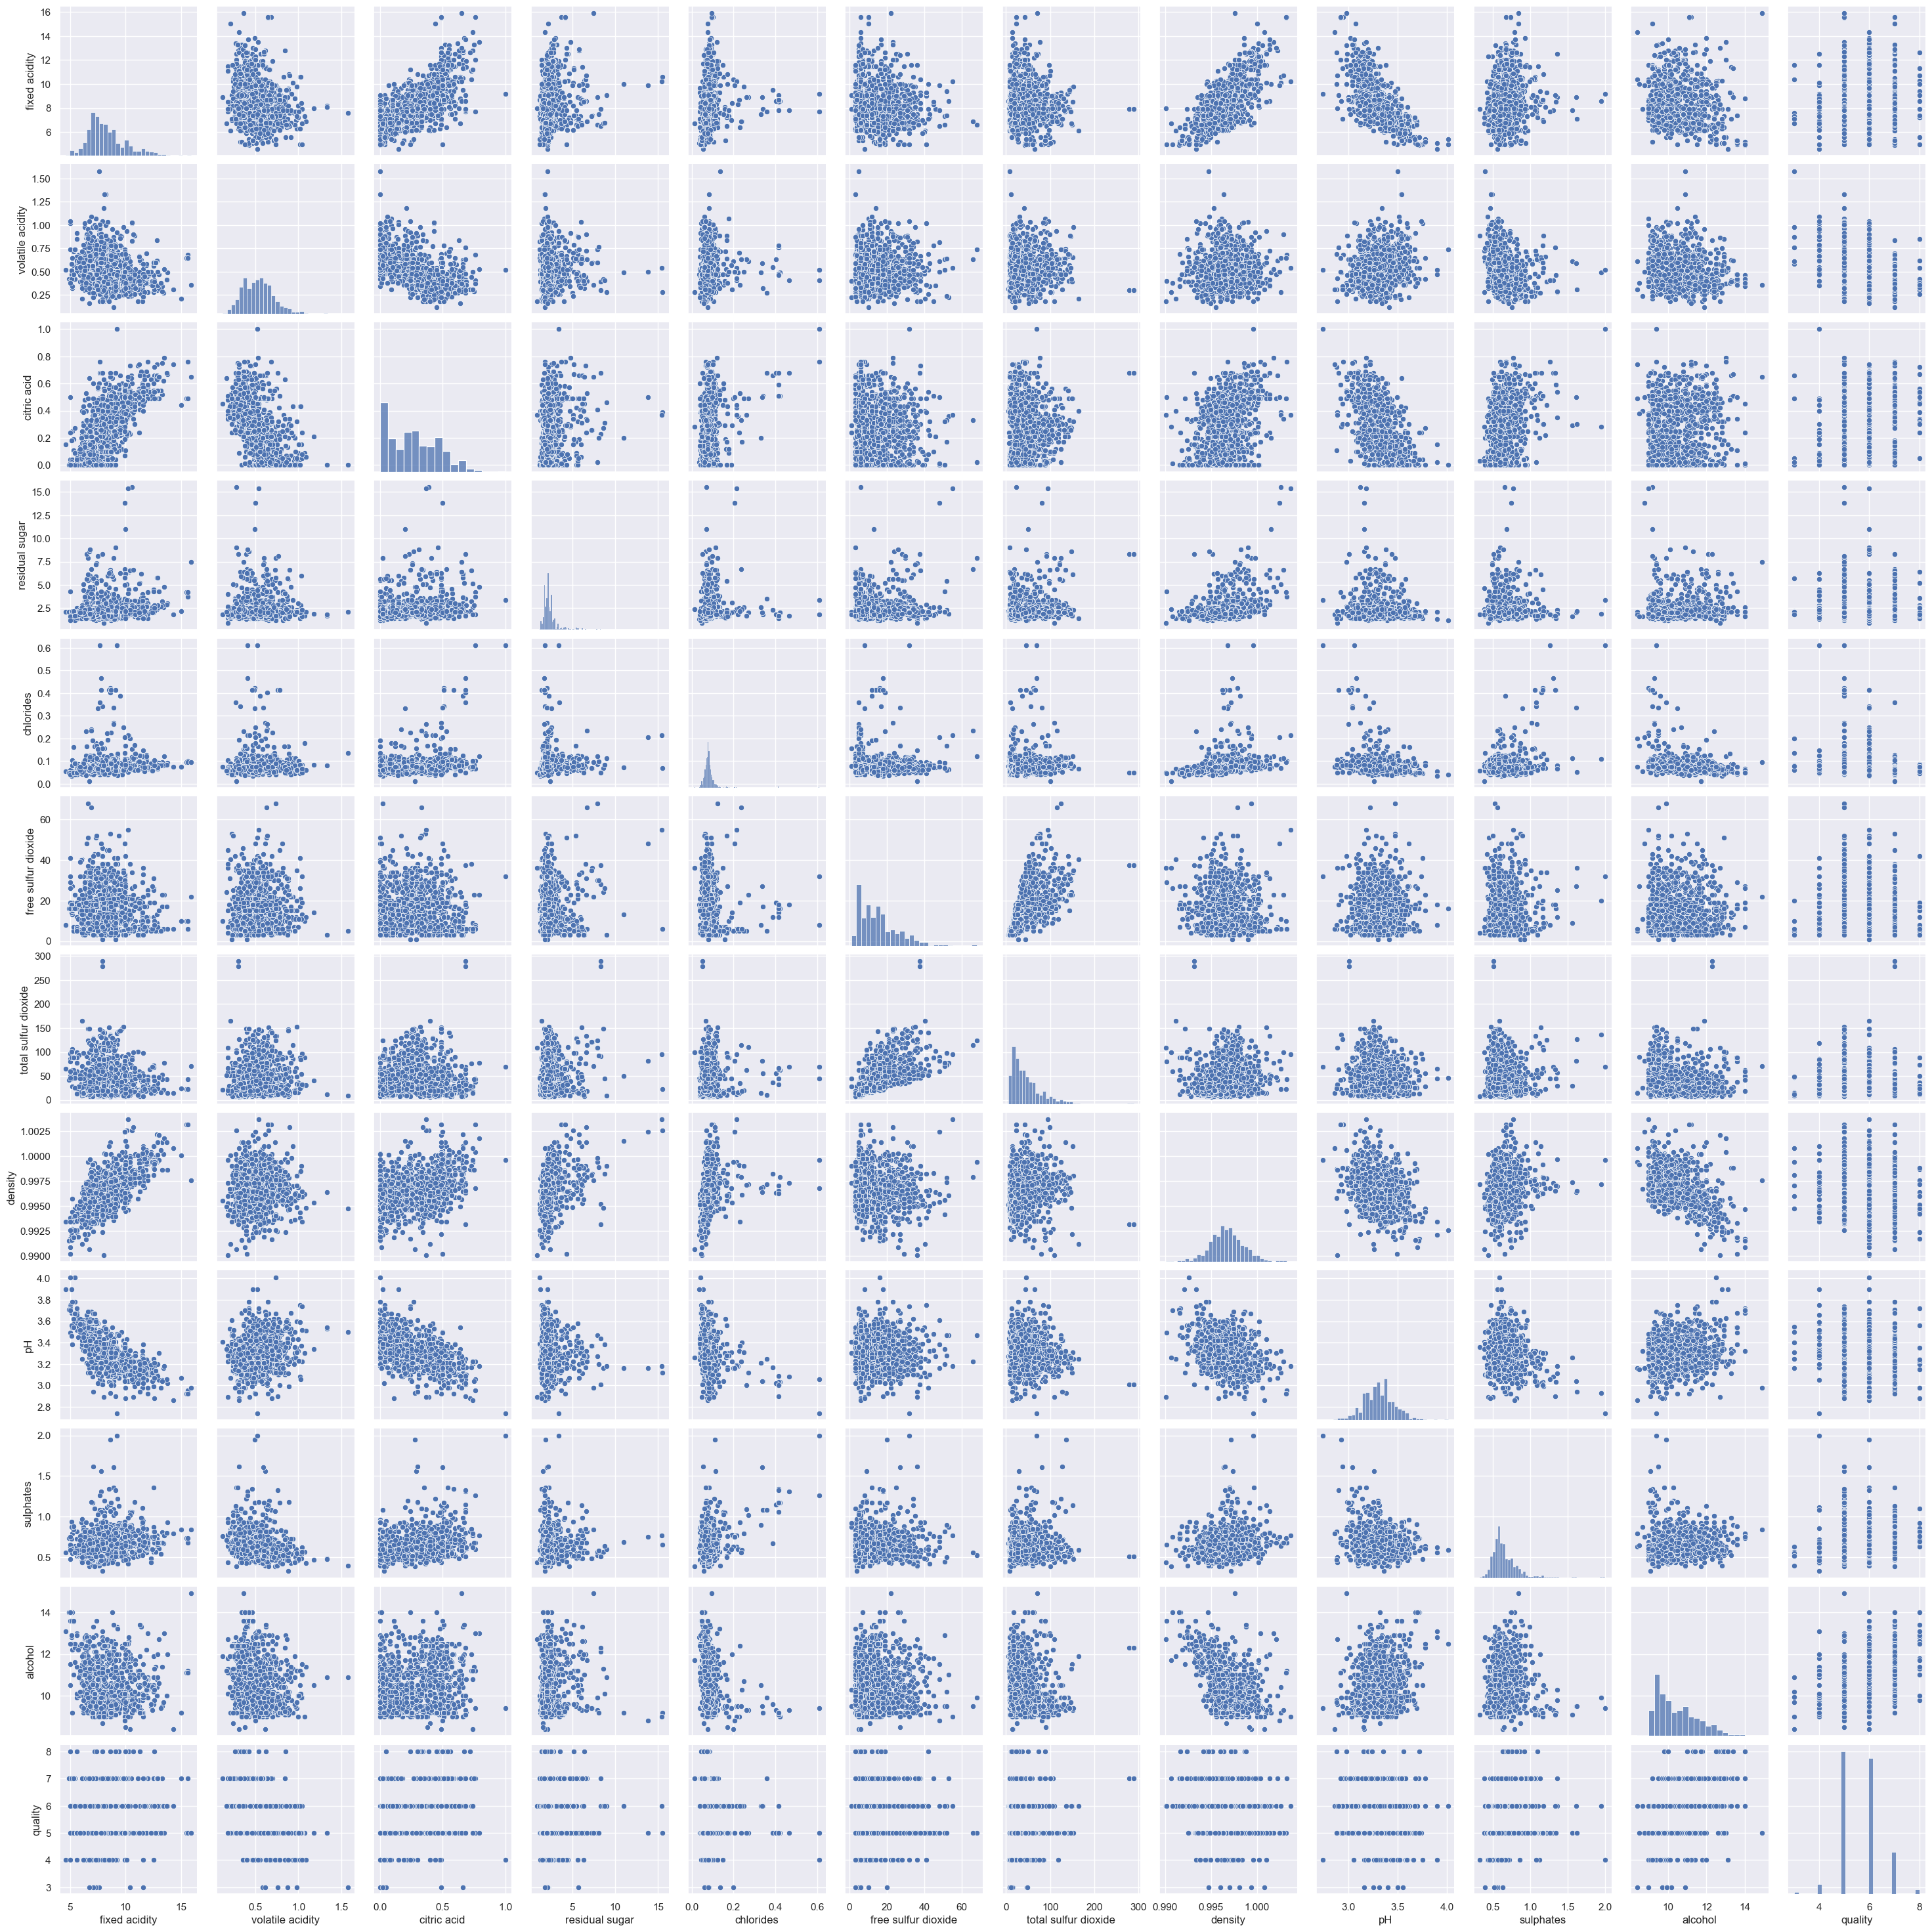

In [18]:
# Scatterplots
sns.set()
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
sns.pairplot(wine_df[cols], size = 2.5)
plt.show()

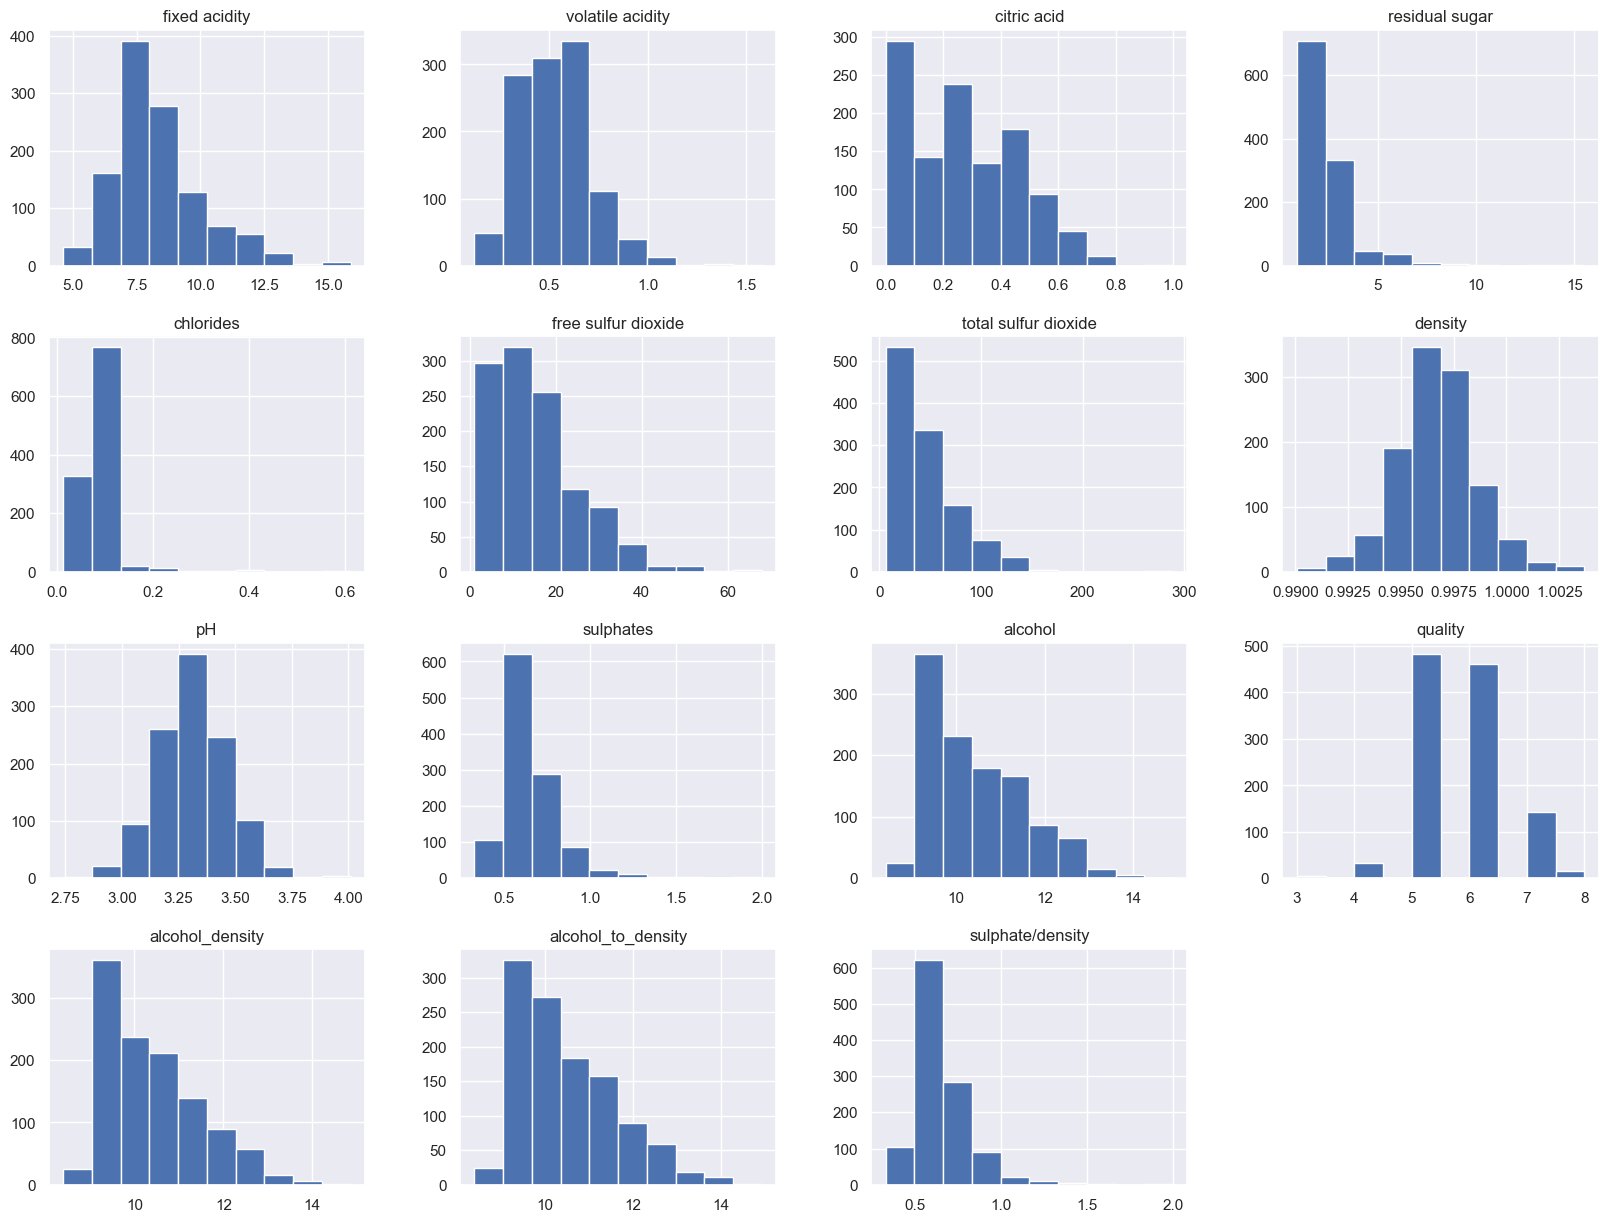

In [19]:
# Histogram of the distributions of numerical features in the dataset
wine_df.hist(figsize=(20,15))
plt.show()

Most look skewed
Check skews

In [21]:
skewed_feats = wine_df.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



Skew
chlorides             6.018449
residual sugar        4.355371
sulphates             2.493988
sulphate/density      2.493872
total sulfur dioxide  1.663579
free sulfur dioxide   1.229645
fixed acidity         1.043558
alcohol_to_density    0.870846
alcohol               0.862180
alcohol_density       0.853796

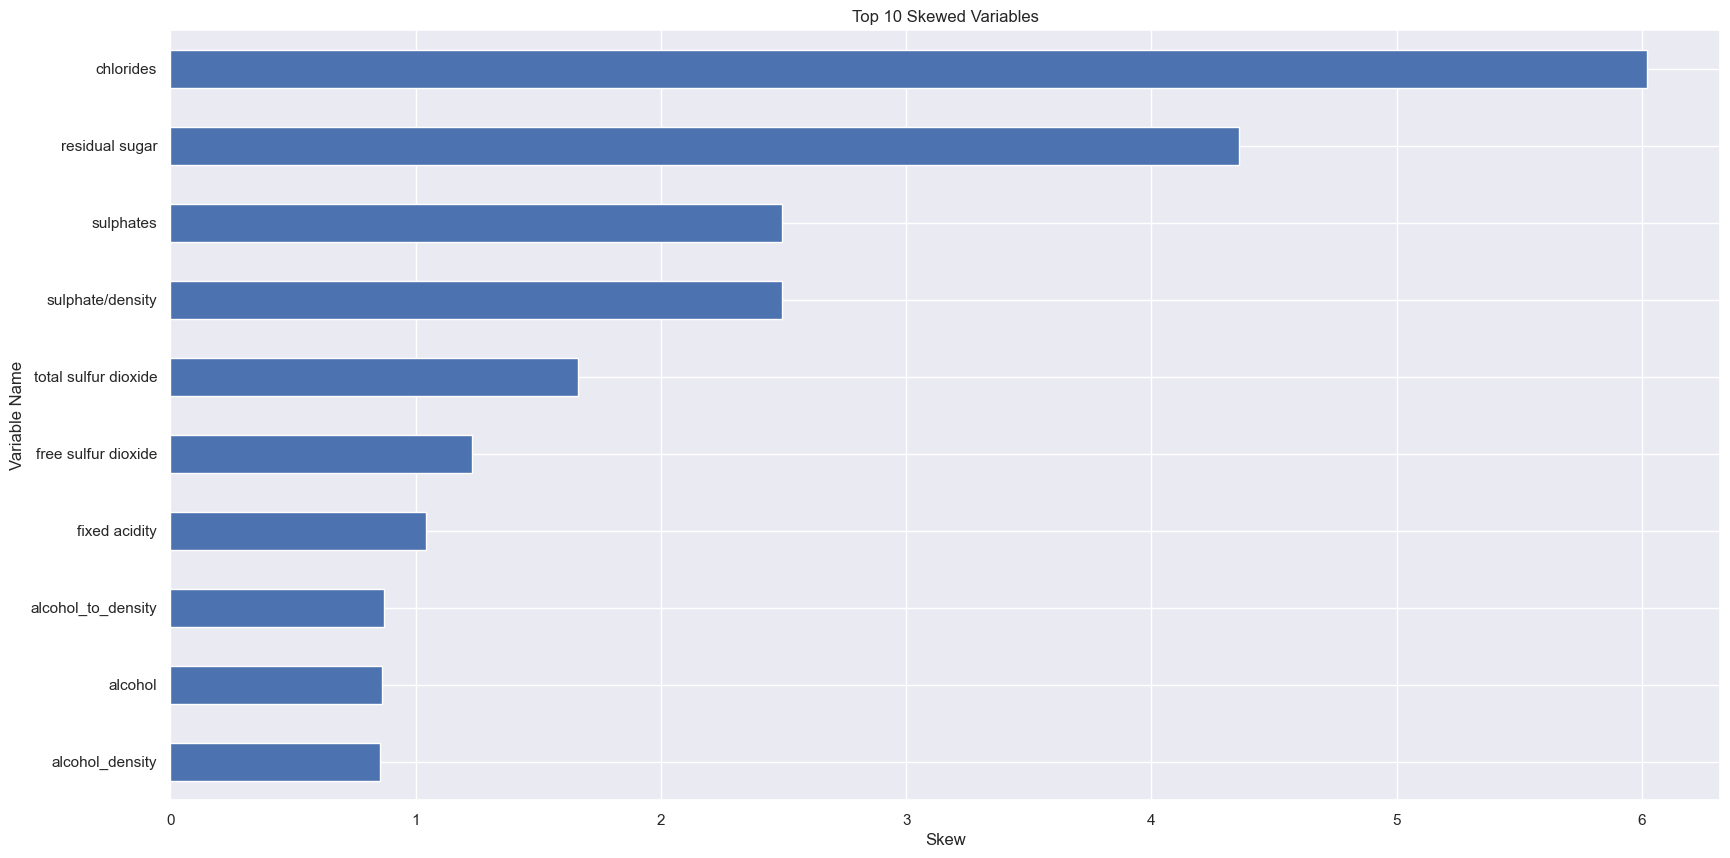

In [22]:
skewness['Skew'].head(10).plot(kind='barh', figsize = (20,10)).invert_yaxis() #top 10 missing columns
plt.xlabel("Skew")
plt.ylabel("Variable Name")
plt.title("Top 10 Skewed Variables")
plt.show()

Although fixing skew does not effect tree models much, we will do it anyway as we found it to help just a little

In [23]:
# Normalize independent variables by box cox
skewness = skewness[abs(skewness) > 0.75]
skewed_features = skewness.index
# Do not box cox the target variable
skewed_features = skewed_features.delete(skewed_features.get_loc('quality'))
lam = .5
for feat in skewed_features:
    wine_df[feat] = boxcox1p(wine_df[feat], lam)

In [24]:
wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       3.796551          0.607681     0.000000        1.405877   0.074608   
1       3.932959          0.742262     0.000000        1.794733   0.095710   
2       3.932959          0.653300     0.039608        1.633180   0.089976   
3       4.985700          0.262742     0.497999        1.405877   0.073644   
4       3.796551          0.607681     0.000000        1.405877   0.074608   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             4.928203              9.832160  0.826871  2.247352   0.497999   
1             8.198039             14.492423  0.826163  2.098780   0.592296   
2             6.000000             12.832397  0.826305  2.127953   0.569047   
3             6.485281             13.620499  0.827013  2.079216   0.513961   
4             4.928203              9.832160  0.826871  2.247352   0.497999   

    alcohol  quality  alcohol_density  alcohol_to_density  sulphate/density  
0  4.449806        5         4.443390            4.456230          0.498988  
1  4.572671        5         4.563121            4.582237          0.593980  
2  4.572671        5         4.563718            4.581638          0.570569  
3  4.572671        6         4.566704            4.578644          0.514886  
4  4.449806        5         4.443390            4.456230          0.498988

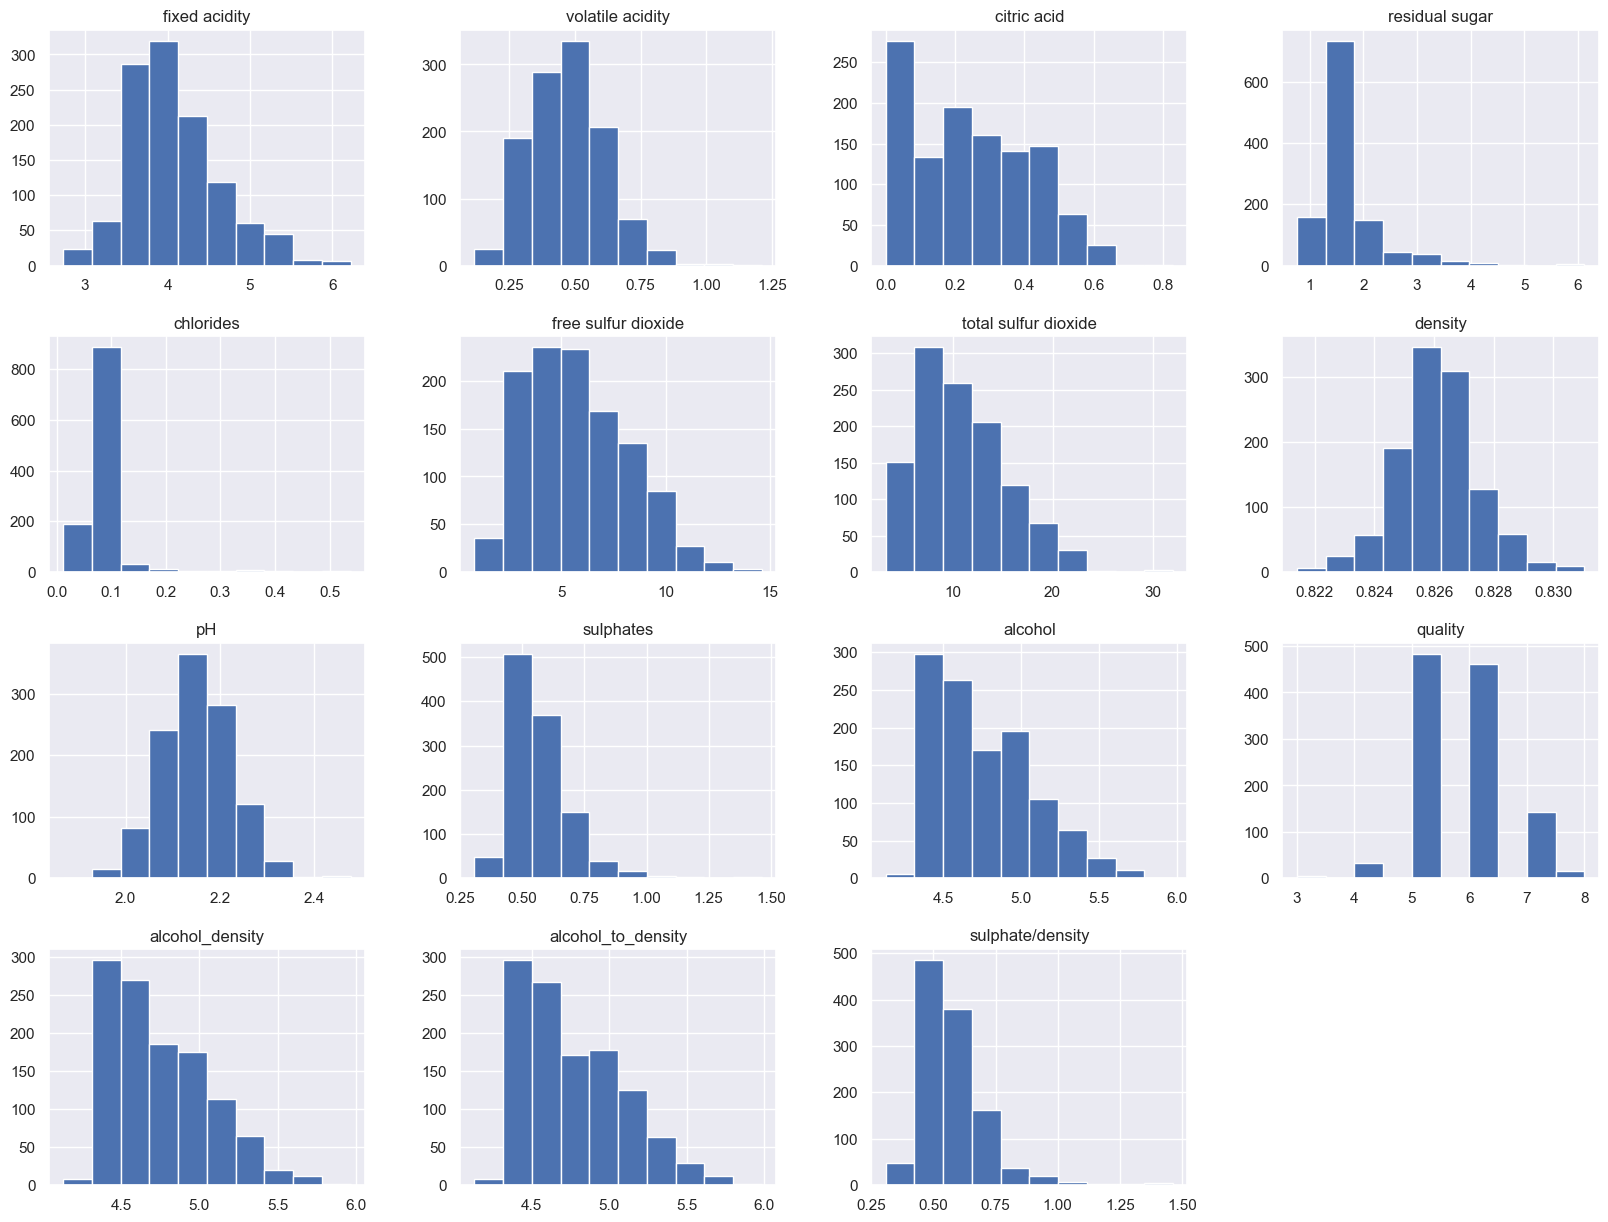

In [25]:
wine_df.hist(figsize=(20,15))
plt.show()


Not perfectly normal but better

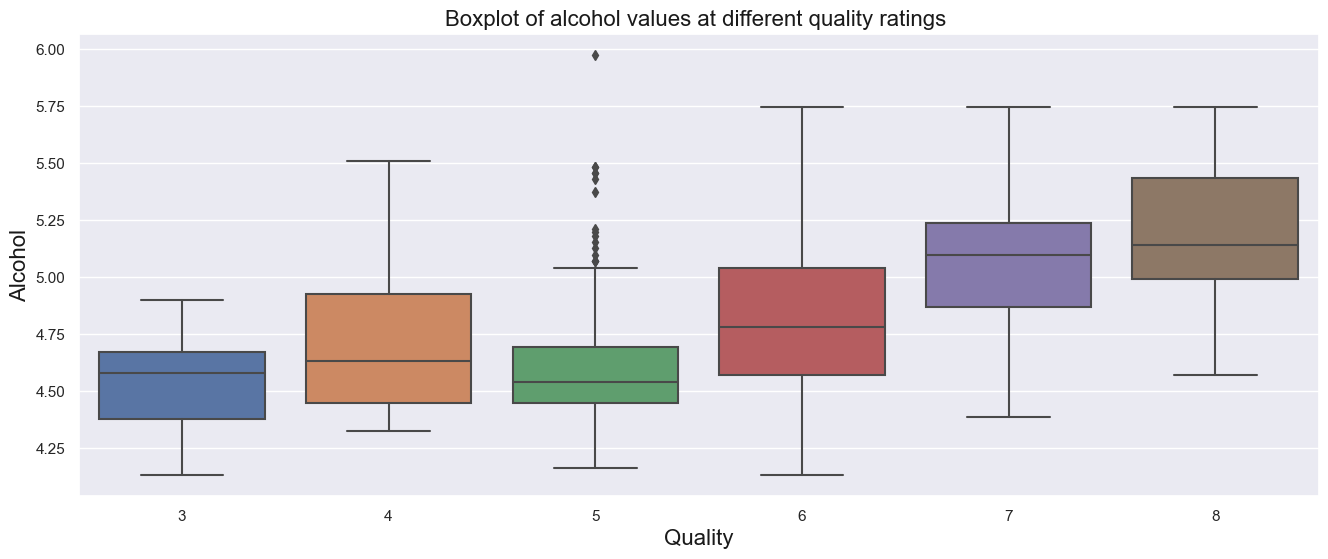

In [27]:
# Alcohol seems to have a high correlation
# Boxplot of alcohol values at diffrent quality ratings
plt.figure(figsize=(16,6))
sns.boxplot(y='alcohol',x='quality',data=wine_df)
plt.title('Boxplot of alcohol values at different quality ratings ',fontsize=16,c='k')
plt.xlabel('Quality',fontsize=16,c='k')
plt.ylabel('Alcohol',fontsize=16,c='k')
plt.show()

Quality increases as alcohol content increases

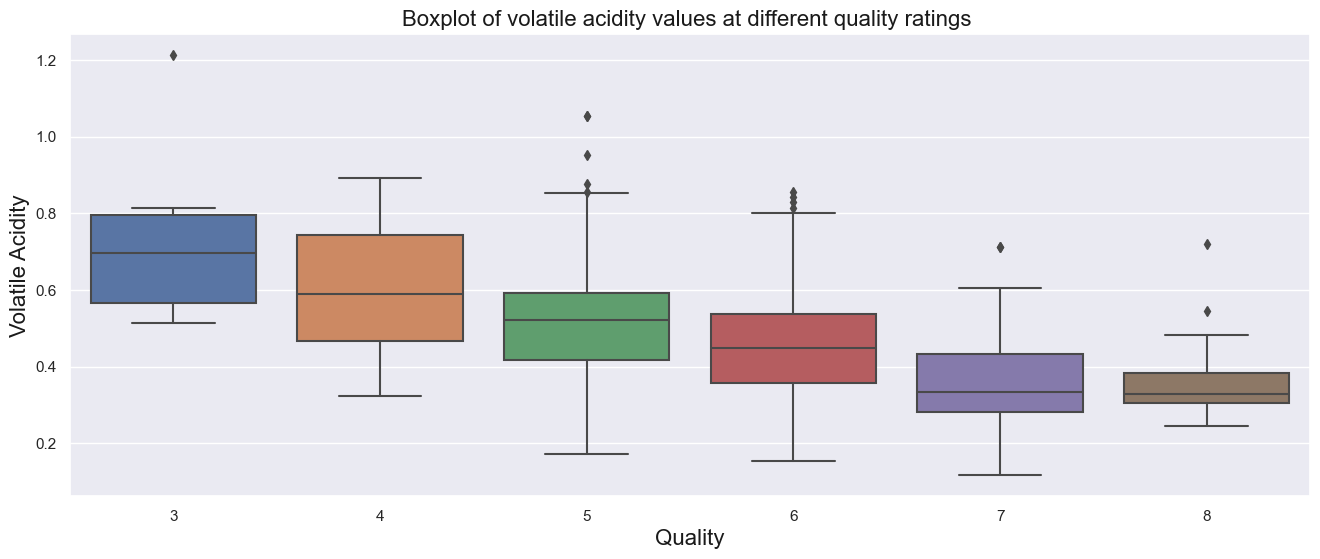

In [29]:
# Volatile acidity seems to have a high correlation
# Boxplot of volatile acidity values at diffrent quality ratings
plt.figure(figsize=(16,6))
sns.boxplot(y='volatile acidity',x='quality',data=wine_df)
plt.title('Boxplot of volatile acidity values at different quality ratings ',fontsize=16,c='k')
plt.xlabel('Quality',fontsize=16,c='k')
plt.ylabel('Volatile Acidity',fontsize=16,c='k')
plt.show()

Looks like as volatile acidity increases quality decreases

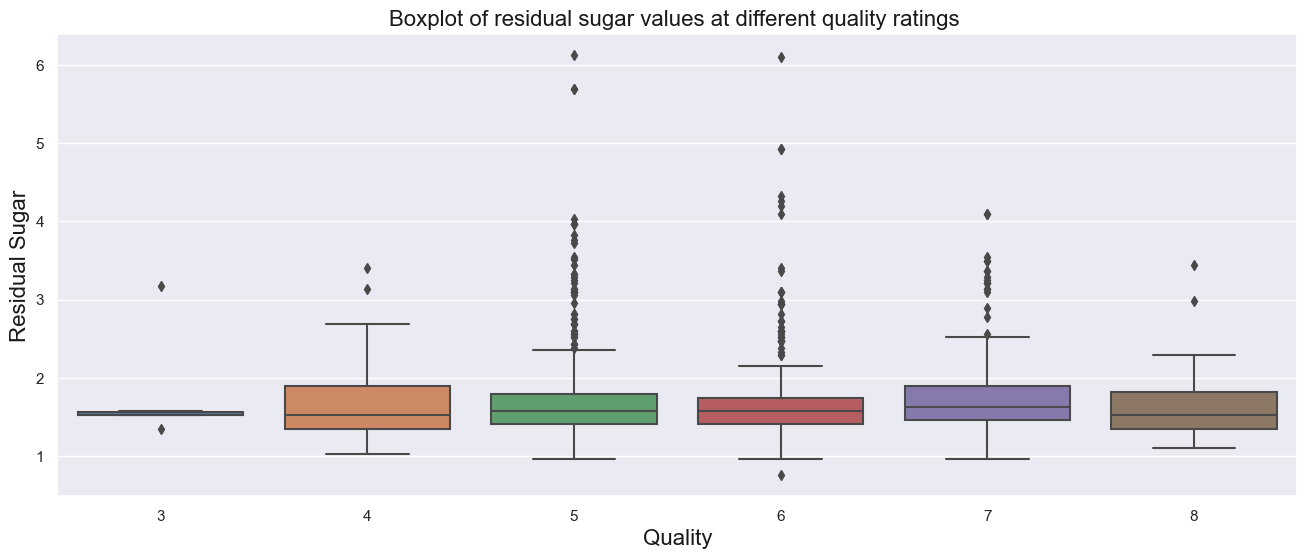

In [31]:
# Boxplot of residual sugar values at diffrent quality ratings
plt.figure(figsize=(16,6))
sns.boxplot(y='residual sugar',x='quality',data=wine_df)
plt.title('Boxplot of residual sugar values at different quality ratings ',fontsize=16,c='k')
plt.xlabel('Quality',fontsize=16,c='k')
plt.ylabel('Residual Sugar',fontsize=16,c='k')
plt.show()

No clear relationship between residual sugars and quality

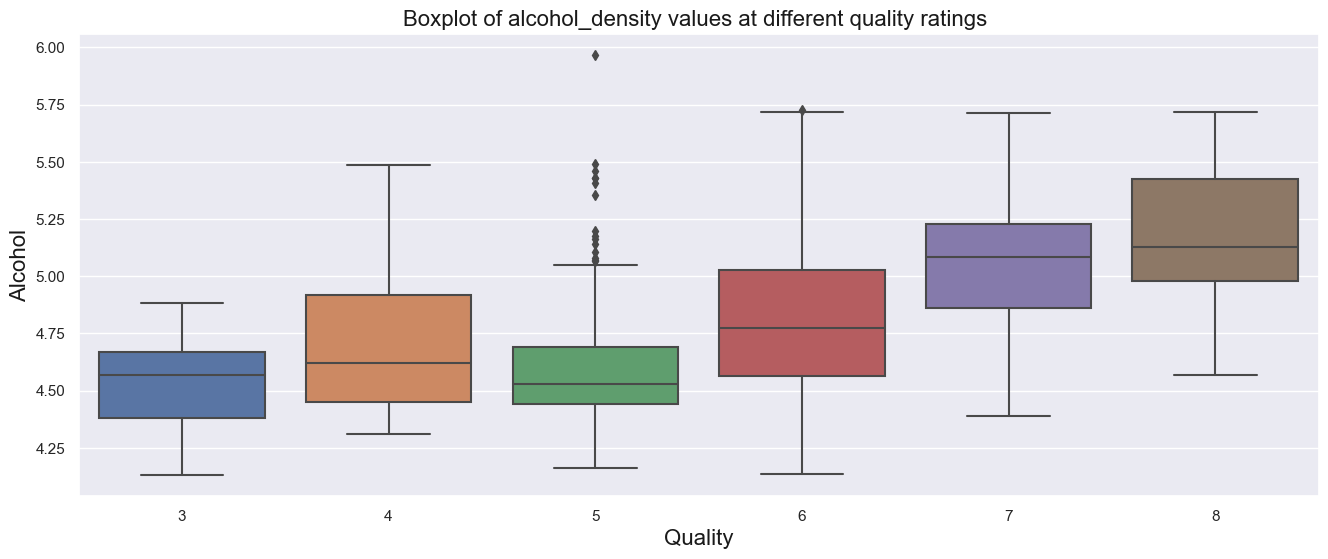

In [33]:
# Alcohol density seems to have a high correlation
# Boxplot of alcohol density values at diffrent quality ratings
plt.figure(figsize=(16,6))
sns.boxplot(y='alcohol_density',x='quality',data=wine_df)
plt.title('Boxplot of alcohol_density values at different quality ratings ',fontsize=16,c='k')
plt.xlabel('Quality',fontsize=16,c='k')
plt.ylabel('Alcohol',fontsize=16,c='k')
plt.show()

Section 3:
Data Analytics

In [36]:
wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       3.796551          0.607681     0.000000        1.405877   0.074608   
1       3.932959          0.742262     0.000000        1.794733   0.095710   
2       3.932959          0.653300     0.039608        1.633180   0.089976   
3       4.985700          0.262742     0.497999        1.405877   0.073644   
4       3.796551          0.607681     0.000000        1.405877   0.074608   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             4.928203              9.832160  0.826871  2.247352   0.497999   
1             8.198039             14.492423  0.826163  2.098780   0.592296   
2             6.000000             12.832397  0.826305  2.127953   0.569047   
3             6.485281             13.620499  0.827013  2.079216   0.513961   
4             4.928203              9.832160  0.826871  2.247352   0.497999   

    alcohol  quality  alcohol_density  alcohol_to_density  sulphate/density  
0  4.449806        5         4.443390            4.456230          0.498988  
1  4.572671        5         4.563121            4.582237          0.593980  
2  4.572671        5         4.563718            4.581638          0.570569  
3  4.572671        6         4.566704            4.578644          0.514886  
4  4.449806        5         4.443390            4.456230          0.498988

In [37]:
# Split into test and train data
# stratify to ensure the proportion of each class in the target variable is the same in both the training and testing datasets
# random_state=0 to get the same split every time the code is run (not sure we need to do this)

Y = wine_df['quality']
X = wine_df[wine_df.columns.difference(['quality'])]
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.20, random_state=0)

F1 score combines precision (model's ability to avoid false positives) and recall (model's ability to identify all positive samples) higher score is better performance. The F1 score is useful when both precision and recall are important for a particular task, and when the class distribution in the data is imbalanced, as is the case with our data. In this case, accuracy can be a misleading metric, as it may be high even if the model is not performing well on the minority class. The Mean Class Accuracy, CV Score, and F1 score provide a more balanced evaluation of the model's performance.

CV Score = cross validation score, higher = better

Micro average takes into account the contributions of all instances (rows) in the dataset equally, regardless of their class label.
Weighted average takes into account the contributions of each class based on its proportion in the dataset.

Support is the number of samples in each class.

In [42]:
# Initial Model
models = [
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    KNeighborsClassifier(),
    SVC(random_state=0),
    LogisticRegression(random_state=0),
]
models_comparison = {}

for model in models:
    print(f"Model: {str(model)}\n")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
    print(classification_report(y_test, y_pred))
    print("Mean class accuracy: ", balanced_accuracy_score(y_pred, y_test)) # this is the correct function right???
    print("-" * 30, "\n")
    models_comparison[f"{str(model)}"] = [
        accuracy_score(y_pred, y_test),
        f1_score(y_pred, y_test, average="macro"),
        precision_score(y_pred, y_test, average="macro"),
        recall_score(y_pred, y_test, average="macro"),
        balanced_accuracy_score(y_pred, y_test),  

                (accuracies.mean()),
    ]

Model: DecisionTreeClassifier(random_state=0)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.10      0.14      0.12         7
           5       0.61      0.69      0.65        97
           6       0.62      0.54      0.58        92
           7       0.38      0.34      0.36        29
           8       0.00      0.00      0.00         3

    accuracy                           0.56       229
   macro avg       0.29      0.29      0.28       229
weighted avg       0.56      0.56      0.56       229

Mean class accuracy:  0.2860963723858729
------------------------------ 

Model: RandomForestClassifier(random_state=0)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.68      0.80      0.74        97
           6       0.61      0.63      0.62        92
           7      

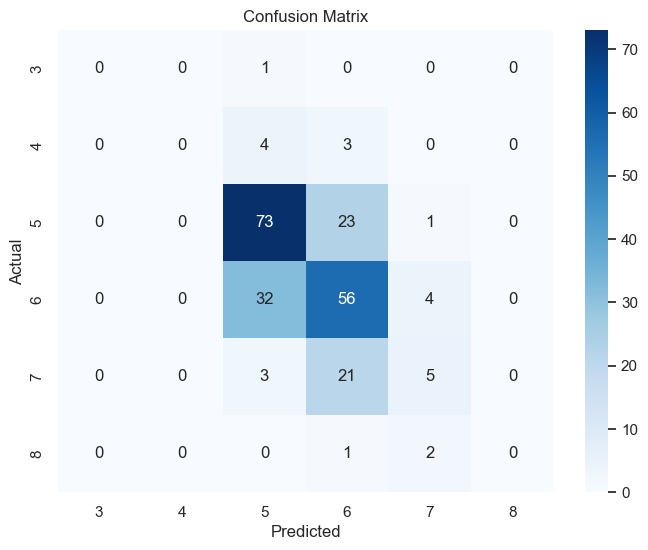

In [43]:
# Create two sample Pandas Series representing actual and predicted values
actual_values = pd.Series(y_test)
predicted_values = pd.Series(y_pred)
# Compute confusion matrix
cm = confusion_matrix(actual_values, predicted_values)

# Create a DataFrame from the confusion matrix
labels = np.unique(y_test)
  # Specify the labels for the confusion matrix
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

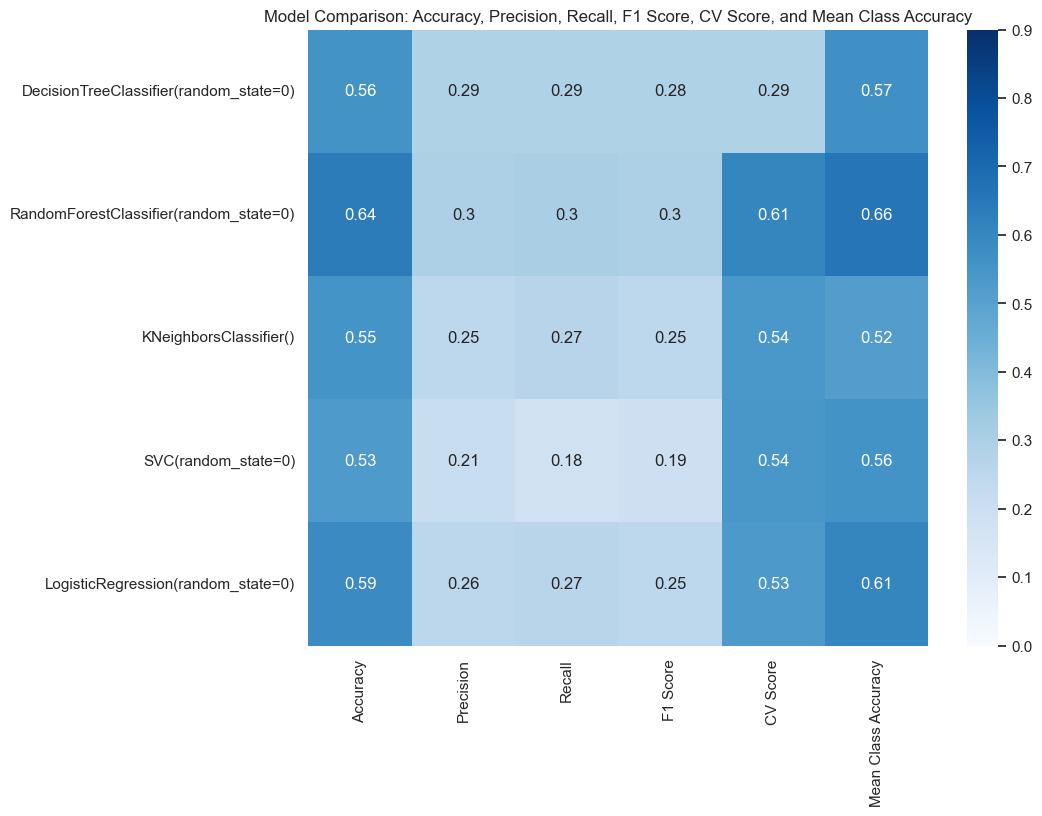

In [44]:
# create a dataframe from the models_comparison dictionary
metrics_df = pd.DataFrame.from_dict(models_comparison, orient='index', 
                            columns=['Accuracy', 'F1 Score', 'Precision', 'Recall', 'CV Score', 'Mean Class Accuracy'])

# create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(metrics_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'CV Score', 'Mean Class Accuracy']], annot=True, cmap='Blues', vmin=0, vmax=.9)
plt.title('Model Comparison: Accuracy, Precision, Recall, F1 Score, CV Score, and Mean Class Accuracy')
plt.show()


In [46]:
# Normalize data (dont need to do this bc box coxed)
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [47]:
wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       3.796551          0.607681     0.000000        1.405877   0.074608   
1       3.932959          0.742262     0.000000        1.794733   0.095710   
2       3.932959          0.653300     0.039608        1.633180   0.089976   
3       4.985700          0.262742     0.497999        1.405877   0.073644   
4       3.796551          0.607681     0.000000        1.405877   0.074608   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             4.928203              9.832160  0.826871  2.247352   0.497999   
1             8.198039             14.492423  0.826163  2.098780   0.592296   
2             6.000000             12.832397  0.826305  2.127953   0.569047   
3             6.485281             13.620499  0.827013  2.079216   0.513961   
4             4.928203              9.832160  0.826871  2.247352   0.497999   

    alcohol  quality  alcohol_density  alcohol_to_density  sulphate/density  
0  4.449806        5         4.443390            4.456230          0.498988  
1  4.572671        5         4.563121            4.582237          0.593980  
2  4.572671        5         4.563718            4.581638          0.570569  
3  4.572671        6         4.566704            4.578644          0.514886  
4  4.449806        5         4.443390            4.456230          0.498988

In [48]:
# Make model less complex by dropping columns that have little effect

In [49]:
winedf_less = wine_df[[ "volatile acidity", "citric acid", "chlorides", "total sulfur dioxide", "sulphates", "alcohol", "alcohol_density",
                      "alcohol_to_density", "sulphate/density", "fixed acidity", "chlorides", "density"]]
winedf_less.head()

volatile acidity  citric acid  chlorides  total sulfur dioxide  sulphates  \
0          0.607681     0.000000   0.074608              9.832160   0.497999   
1          0.742262     0.000000   0.095710             14.492423   0.592296   
2          0.653300     0.039608   0.089976             12.832397   0.569047   
3          0.262742     0.497999   0.073644             13.620499   0.513961   
4          0.607681     0.000000   0.074608              9.832160   0.497999   

    alcohol  alcohol_density  alcohol_to_density  sulphate/density  \
0  4.449806         4.443390            4.456230          0.498988   
1  4.572671         4.563121            4.582237          0.593980   
2  4.572671         4.563718            4.581638          0.570569   
3  4.572671         4.566704            4.578644          0.514886   
4  4.449806         4.443390            4.456230          0.498988   

   fixed acidity  chlorides   density  
0       3.796551   0.074608  0.826871  
1       3.932959   0.095710  0.826163  
2       3.932959   0.089976  0.826305  
3       4.985700   0.073644  0.827013  
4       3.796551   0.074608  0.826871

In [50]:
Y = wine_df['quality']
X = winedf_less
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.20, random_state=0)


In [51]:
models = [
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    KNeighborsClassifier(),
    SVC(random_state=0),
    LogisticRegression(random_state=0),
]
models_comparison = {}

for model in models:
    print(f"Model: {str(model)}\n")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
    print(classification_report(y_test, y_pred))
    print("Mean class accuracy: ", balanced_accuracy_score(y_pred, y_test))
    print("-" * 30, "\n")
    models_comparison[f"{str(model)}"] = [
        accuracy_score(y_pred, y_test),
        f1_score(y_pred, y_test, average="macro"),
        precision_score(y_pred, y_test, average="macro"),
        recall_score(y_pred, y_test, average="macro"),
        balanced_accuracy_score(y_pred, y_test),  

                (accuracies.mean()),
    ]

Model: DecisionTreeClassifier(random_state=0)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.14      0.14      0.14         7
           5       0.64      0.76      0.70        97
           6       0.56      0.49      0.52        92
           7       0.32      0.24      0.27        29
           8       0.25      0.33      0.29         3

    accuracy                           0.56       229
   macro avg       0.32      0.33      0.32       229
weighted avg       0.55      0.56      0.55       229

Mean class accuracy:  0.3195028703180877
------------------------------ 

Model: RandomForestClassifier(random_state=0)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.67      0.82      0.74        97
           6       0.63      0.61      0.62        92
           7      

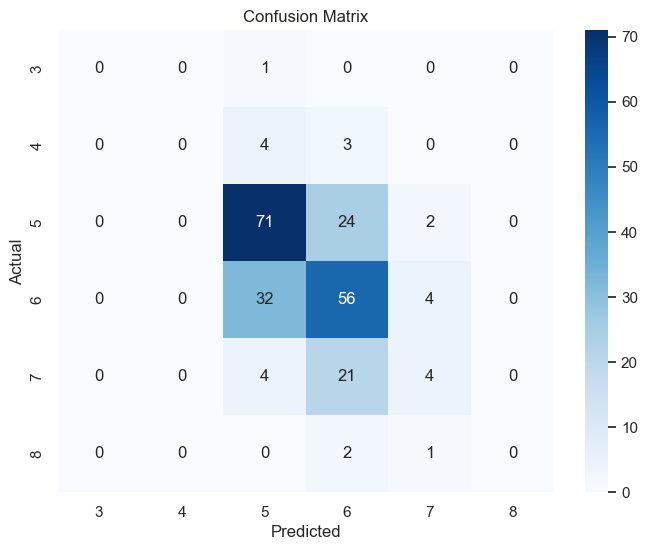

In [52]:
# Create two sample Pandas Series representing actual and predicted values
actual_values = pd.Series(y_test)
predicted_values = pd.Series(y_pred)
# Compute confusion matrix
cm = confusion_matrix(actual_values, predicted_values)

# Create a DataFrame from the confusion matrix
labels = np.unique(y_test)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

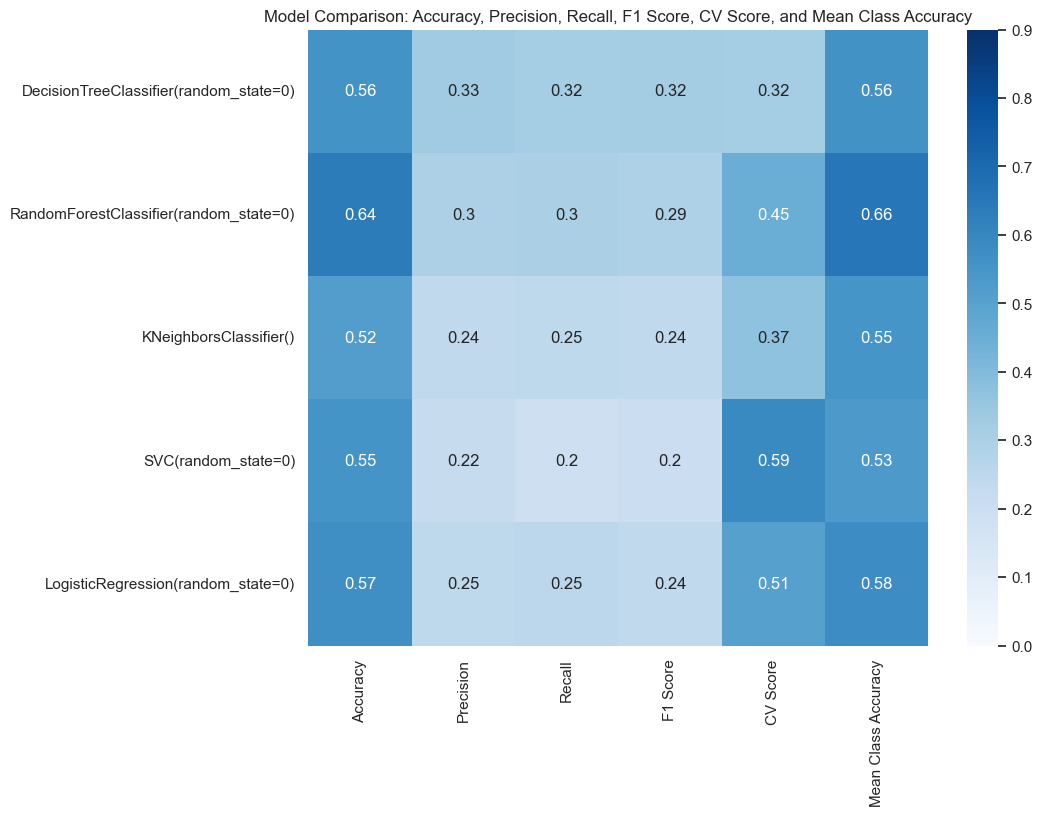

In [53]:
# create a dataframe from the models_comparison dictionary
metrics_df = pd.DataFrame.from_dict(models_comparison, orient='index', 
                            columns=['Accuracy', 'F1 Score', 'Precision', 'Recall', 'CV Score', 'Mean Class Accuracy'])

# create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(metrics_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'CV Score', 'Mean Class Accuracy']], annot=True, cmap='Blues', vmin=0, vmax=.9)
plt.title('Model Comparison: Accuracy, Precision, Recall, F1 Score, CV Score, and Mean Class Accuracy')
plt.show()


Lets see what balancing the data does

<AxesSubplot:xlabel='quality', ylabel='count'>

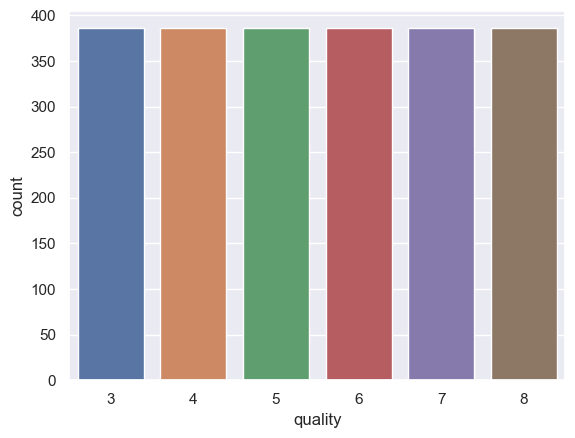

In [54]:
#oversample to balance data
oversample = RandomOverSampler(random_state=0)
X_train_ov, y_train_ov = oversample.fit_resample(X_train, y_train)
sns.countplot(data=X_train_ov, x=y_train_ov)

In [55]:
models = [
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    KNeighborsClassifier(),
    SVC(random_state=0),
    LogisticRegression(random_state=0),
]
models_comparison = {}

for model in models:
    print(f"Model: {str(model)}\n")
    model.fit(X_train_ov, y_train_ov)
    y_pred = model.predict(X_test)
    accuracies = cross_val_score(estimator=model, X=X_train_ov, y=y_train_ov, cv=5)
    print(classification_report(y_test, y_pred))
    print("Mean class accuracy: ", balanced_accuracy_score(y_pred, y_test))
    print("-" * 30, "\n")
    models_comparison[f"{str(model)}"] = [
        accuracy_score(y_pred, y_test),
        f1_score(y_pred, y_test, average="macro"),
        precision_score(y_pred, y_test, average="macro"),
        recall_score(y_pred, y_test, average="macro"),
        balanced_accuracy_score(y_pred, y_test),  

                (accuracies.mean()),
    ]

Model: DecisionTreeClassifier(random_state=0)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.11      0.14      0.12         7
           5       0.61      0.63      0.62        97
           6       0.57      0.60      0.59        92
           7       0.48      0.38      0.42        29
           8       0.00      0.00      0.00         3

    accuracy                           0.56       229
   macro avg       0.30      0.29      0.29       229
weighted avg       0.55      0.56      0.55       229

Mean class accuracy:  0.354457729468599
------------------------------ 

Model: RandomForestClassifier(random_state=0)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.70      0.81      0.75        97
           6       0.63      0.58      0.60        92
           7       

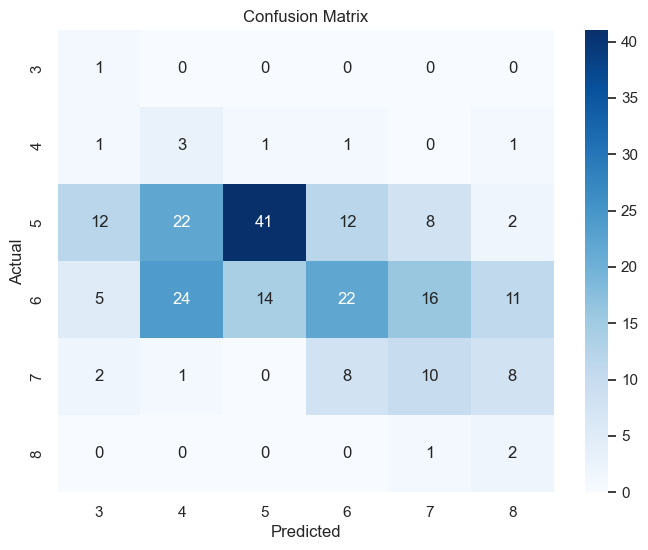

In [56]:
# Create two sample Pandas Series representing actual and predicted values
actual_values = pd.Series(y_test)
predicted_values = pd.Series(y_pred)
# Compute confusion matrix
cm = confusion_matrix(actual_values, predicted_values)

# Create a DataFrame from the confusion matrix
labels = np.unique(y_test)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

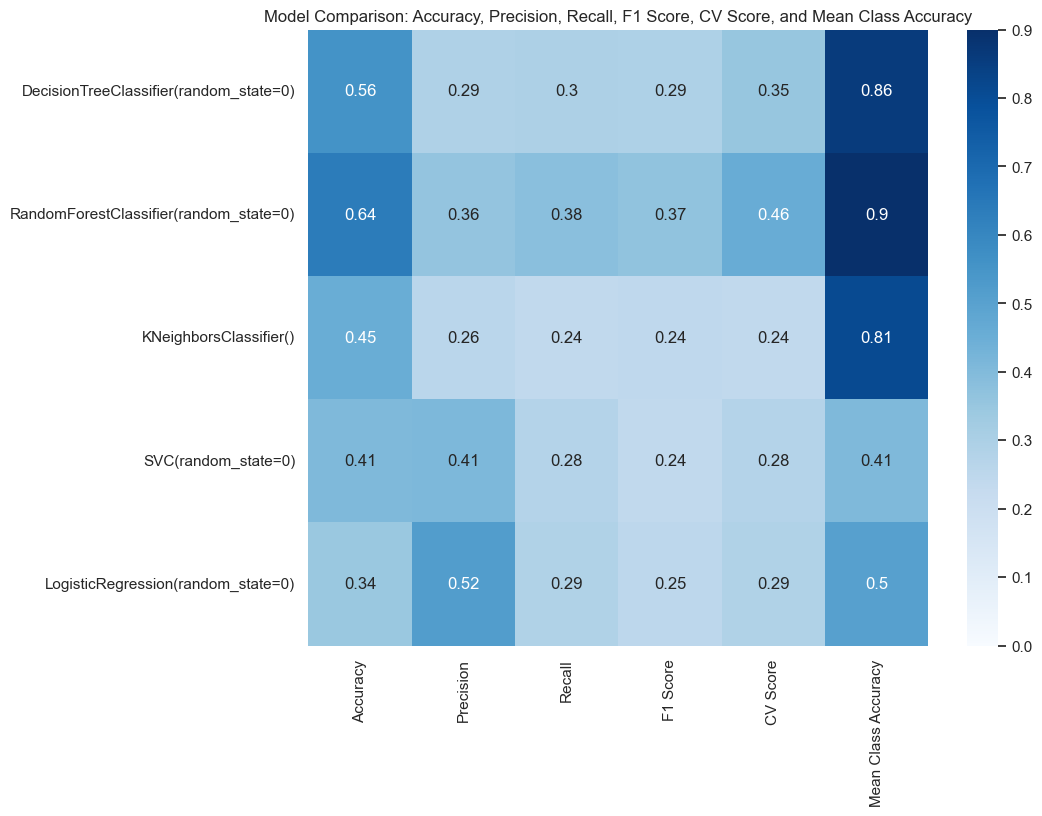

In [57]:
# create a dataframe from the models_comparison dictionary
metrics_df = pd.DataFrame.from_dict(models_comparison, orient='index', 
                            columns=['Accuracy', 'F1 Score', 'Precision', 'Recall', 'CV Score', 'Mean Class Accuracy'])

# create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(metrics_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'CV Score', 'Mean Class Accuracy']], annot=True, cmap='Blues', vmin=0, vmax=.9)
plt.title('Model Comparison: Accuracy, Precision, Recall, F1 Score, CV Score, and Mean Class Accuracy')
plt.show()


Better Performance

In [58]:
# try smote to oversample, saw this on kaggle
Y = wine_df['quality']
X = winedf_less
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.20, random_state=0)

#oversampling the data to balance the quality classes
sm = SMOTE(k_neighbors=4)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

y_train_sm.value_counts()

5    386
6    386
7    386
8    386
4    386
3    386
Name: quality, dtype: int64

In [59]:
models = [
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    KNeighborsClassifier(),
    SVC(random_state=0),
    LogisticRegression(random_state=0),
]
models_comparison = {}

for model in models:
    print(f"Model: {str(model)}\n")
    model.fit(X_train_sm, y_train_sm)
    y_pred = model.predict(X_test)
    accuracies = cross_val_score(estimator=model, X=X_train_sm, y=y_train_sm, cv=5)
    print(classification_report(y_test, y_pred))
    print("Mean class accuracy: ", balanced_accuracy_score(y_pred, y_test))
    print("-" * 30, "\n")
    models_comparison[f"{str(model)}"] = [
        accuracy_score(y_pred, y_test),
        f1_score(y_pred, y_test, average="macro"),
        precision_score(y_pred, y_test, average="macro"),
        recall_score(y_pred, y_test, average="macro"),
        balanced_accuracy_score(y_pred, y_test),  

                (accuracies.mean()),
    ]

Model: DecisionTreeClassifier(random_state=0)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.68      0.61      0.64        97
           6       0.49      0.47      0.48        92
           7       0.35      0.38      0.37        29
           8       0.17      0.33      0.22         3

    accuracy                           0.50       229
   macro avg       0.28      0.30      0.29       229
weighted avg       0.53      0.50      0.51       229

Mean class accuracy:  0.28231986157458905
------------------------------ 

Model: RandomForestClassifier(random_state=0)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.29      0.21         7
           5       0.72      0.74      0.73        97
           6       0.61      0.52      0.56        92
           7     

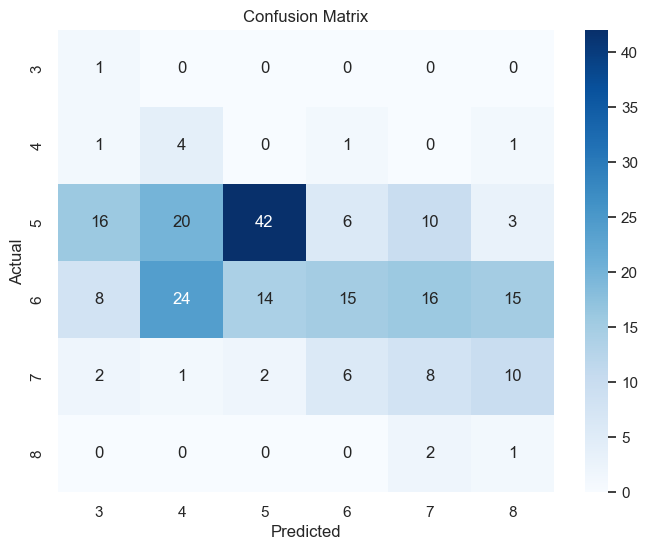

In [60]:
# Confusion matrix
# Create two sample Pandas Series representing actual and predicted values
actual_values = pd.Series(y_test)
predicted_values = pd.Series(y_pred)
# Compute confusion matrix
cm = confusion_matrix(actual_values, predicted_values)

# Create a DataFrame from the confusion matrix
labels = np.unique(y_test)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

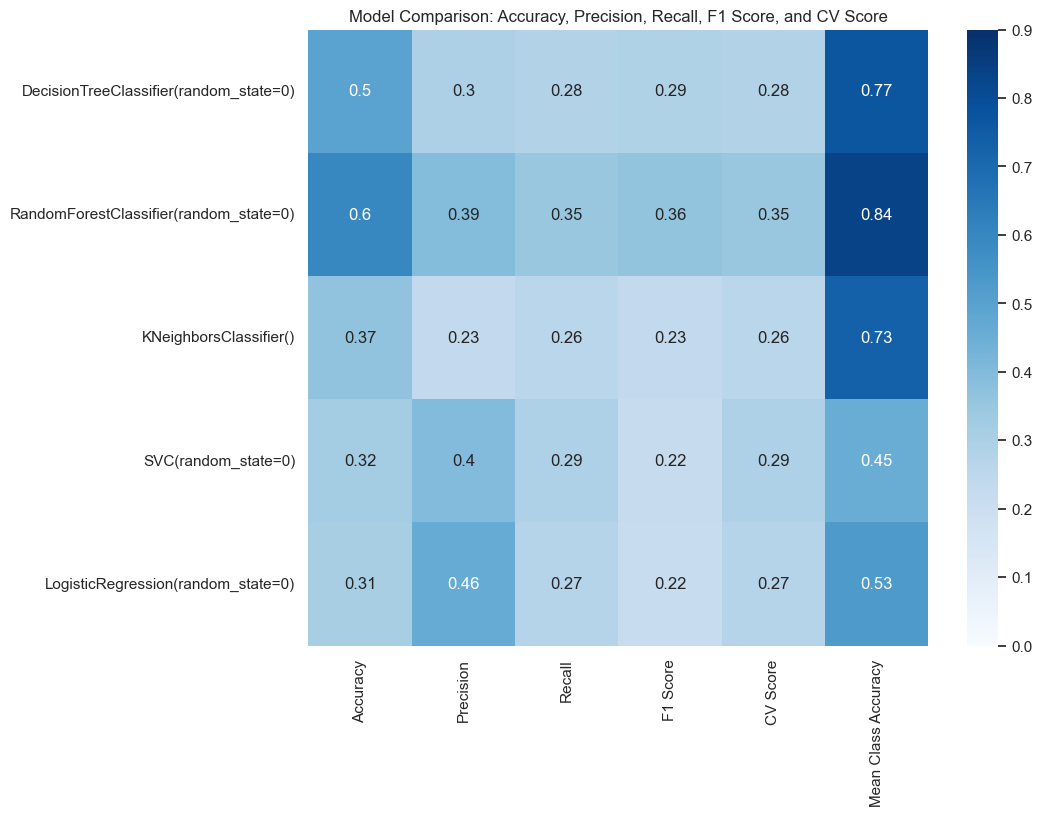

In [61]:
# create a dataframe from the models_comparison dictionary
metrics_df = pd.DataFrame.from_dict(models_comparison, orient='index', 
                            columns=['Accuracy', 'F1 Score', 'Precision', 'Recall', 'CV Score', 'Mean Class Accuracy'])

# create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(metrics_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'CV Score', 'Mean Class Accuracy']], annot=True, cmap='Blues', vmin=0, vmax=.9)
plt.title('Model Comparison: Accuracy, Precision, Recall, F1 Score, CV Score, and Mean Class Accuracy')
plt.show()


In [62]:
# What if we changed quality to purely categorical?

In [63]:
wine_df = pd.read_csv('WineQT.csv')
wine_df['quality_label'] = wine_df.quality.apply(lambda q: 'low' if q <= 5 else 'medium' if q <= 7 else 'high')
wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id quality_label  
0      9.4        5   0           low  
1      9.8        5   1           low  
2      9.8        5   2           low  
3      9.8        6   3        medium  
4      9.4        5   4           low

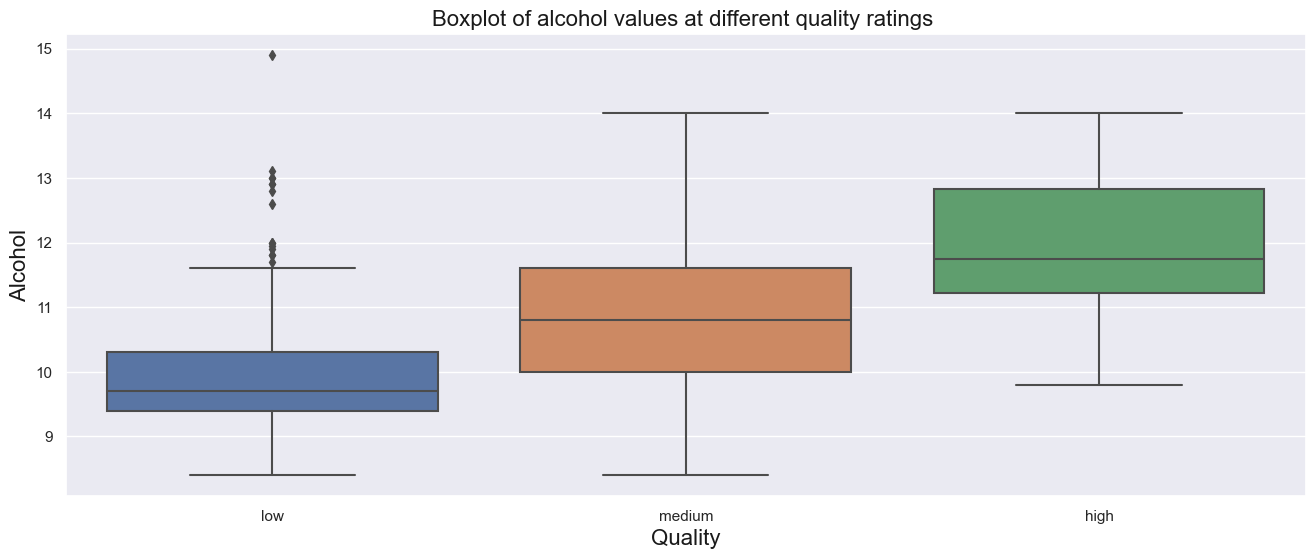

In [64]:
# Boxplot of alcohol values at diffrent quality ratings
plt.figure(figsize=(16,6))
sns.boxplot(y='alcohol',x='quality_label',data=wine_df)
plt.title('Boxplot of alcohol values at different quality ratings ',fontsize=16,c='k')
plt.xlabel('Quality',fontsize=16,c='k')
plt.ylabel('Alcohol',fontsize=16,c='k')
plt.show()

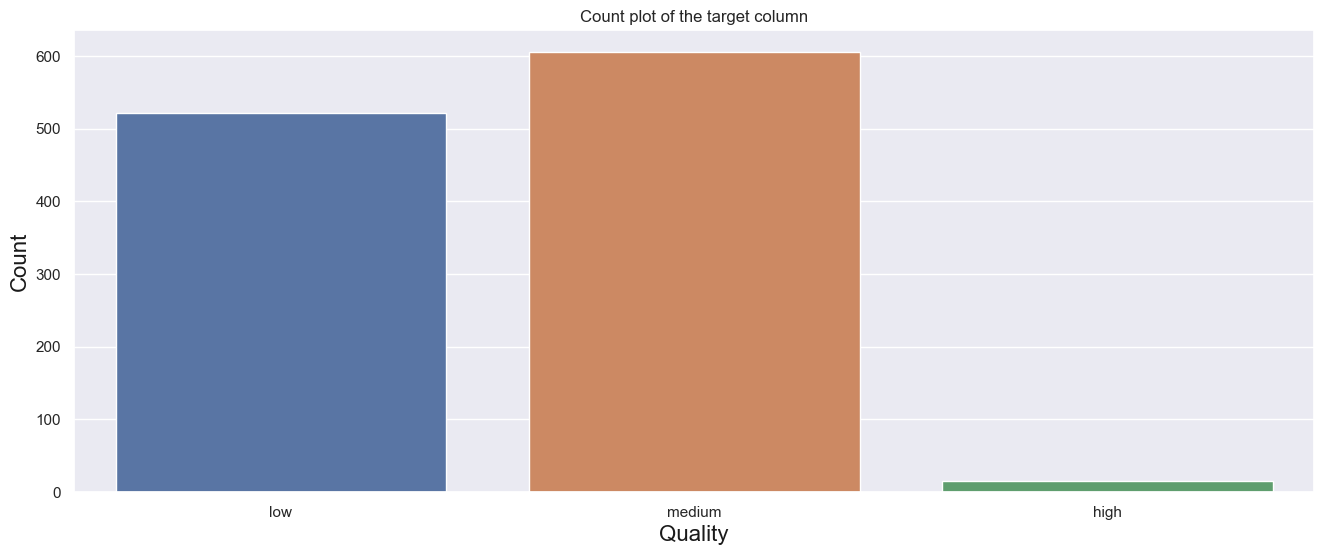

In [65]:
#Checking the distribution of the target column (quality)
plt.figure(figsize=(16,6))
sns.countplot(x=wine_df['quality_label'])
plt.title('Count plot of the target column')
plt.xlabel('Quality',fontsize=16,c='k')
plt.ylabel('Count',fontsize=16,c='k')
plt.show()

In [66]:
# Redo data changes 
# Drop ID column
wine_df = wine_df.drop('Id', axis=1)
wine_df.columns
# Feature construction
wine_df['alcohol_density'] = wine_df['alcohol']  * wine_df['density']
wine_df['alcohol_to_density'] = wine_df['alcohol'] / wine_df['density']
wine_df['sulphate/density'] = wine_df['sulphates']  / wine_df['density']
# Normalize independent variables
skewness = skewness[abs(skewness) > 0.75]
skewed_features = skewness.index
# Do not box cox the target variable
# skewed_features = skewed_features.drop(['quality'])

lam = .5
for feat in skewed_features:
    wine_df[feat] = boxcox1p(wine_df[feat], lam)
# Drop columns with little influence
winedf_less = wine_df[[ "volatile acidity", "citric acid", "chlorides", "total sulfur dioxide", "sulphates", "alcohol", "alcohol_density",
                      "alcohol_to_density", "sulphate/density", "fixed acidity", "chlorides", "density"]]

In [67]:
Y = wine_df['quality_label']
X = winedf_less
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.20, random_state=0)

#oversampling the data to balance the quality classes
#oversample to balance data
oversample = RandomOverSampler(random_state=0)
X_train_ov, y_train_ov = oversample.fit_resample(X_train, y_train)
y_train_ov.value_counts()

medium    484
low       484
high      484
Name: quality_label, dtype: int64

Model: DecisionTreeClassifier(random_state=0)

              precision    recall  f1-score   support

        high       0.00      0.00      0.00         3
         low       0.82      0.69      0.75       105
      medium       0.74      0.85      0.79       121

    accuracy                           0.76       229
   macro avg       0.52      0.51      0.51       229
weighted avg       0.77      0.76      0.76       229

Mean class accuracy:  0.5197296708088075
------------------------------ 



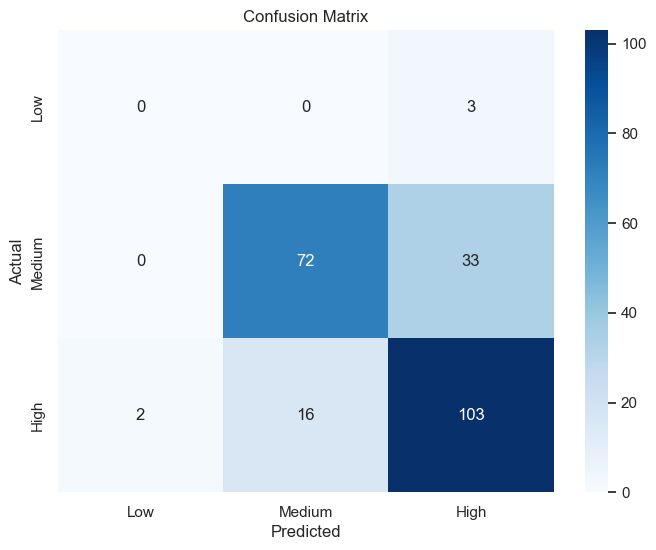

Model: RandomForestClassifier(random_state=0)

              precision    recall  f1-score   support

        high       0.00      0.00      0.00         3
         low       0.82      0.73      0.77       105
      medium       0.77      0.86      0.81       121

    accuracy                           0.79       229
   macro avg       0.53      0.53      0.53       229
weighted avg       0.78      0.79      0.78       229

Mean class accuracy:  0.7947596532702916
------------------------------ 



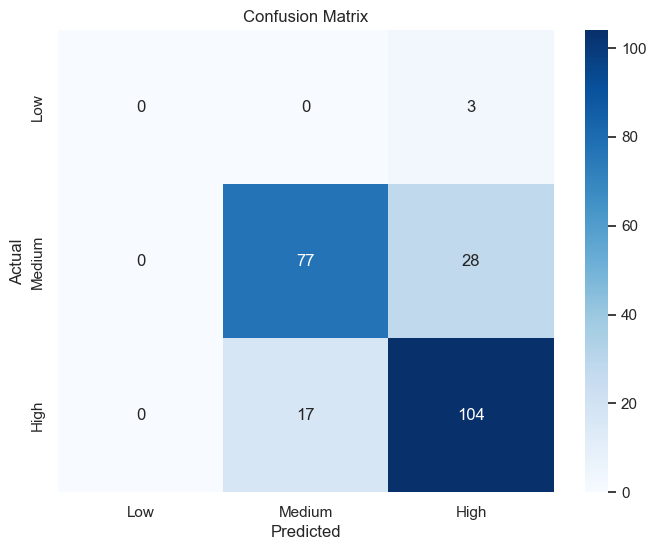

Model: KNeighborsClassifier()

              precision    recall  f1-score   support

        high       0.00      0.00      0.00         3
         low       0.74      0.64      0.69       105
      medium       0.69      0.74      0.71       121

    accuracy                           0.69       229
   macro avg       0.48      0.46      0.47       229
weighted avg       0.70      0.69      0.69       229

Mean class accuracy:  0.4771557817359344
------------------------------ 



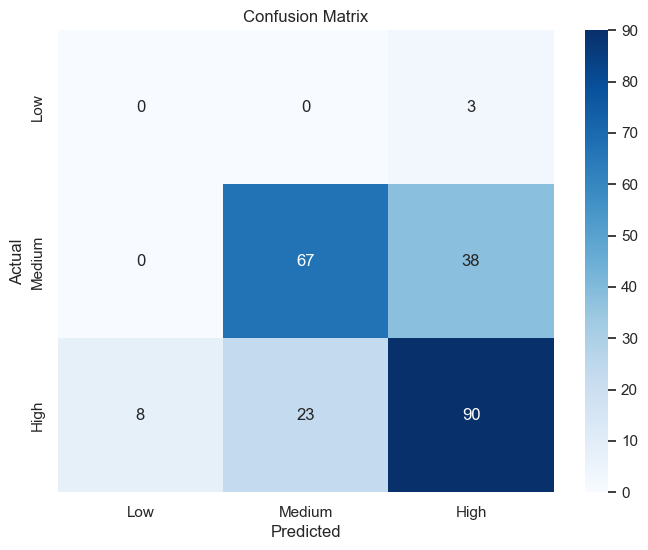

Model: SVC(random_state=0)

              precision    recall  f1-score   support

        high       0.05      1.00      0.10         3
         low       0.74      0.72      0.73       105
      medium       0.77      0.44      0.56       121

    accuracy                           0.58       229
   macro avg       0.52      0.72      0.46       229
weighted avg       0.74      0.58      0.63       229

Mean class accuracy:  0.5195371995487523
------------------------------ 



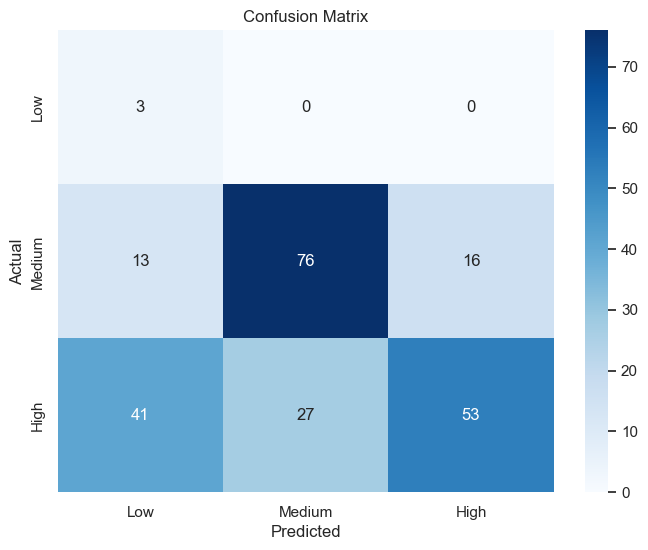

Model: LogisticRegression(random_state=0)

Coefficients:  [[-0.89512869  4.05697915 -2.72788948 -0.10363368  1.48196582  0.67510557
   0.29984713  1.0523015   1.55761885 -0.56575099 -2.72788948 -3.67614804]
 [ 3.4947307  -0.57013979  1.80067114  0.08872522 -1.37908382 -0.73517535
  -0.57899412 -0.8924607  -1.41004008  0.15471204  1.80067114  3.77992735]
 [-2.59960201 -3.48683936  0.92721834  0.01490846 -0.102882    0.06006978
   0.27914699 -0.15984079 -0.14757878  0.41103895  0.92721834 -0.10377931]]
['high' 'low' 'medium']
                 feature  coefficient high  coefficient low  \
0       volatile acidity         -0.895129         3.494731   
1            citric acid          4.056979        -0.570140   
2              chlorides         -2.727889         1.800671   
3   total sulfur dioxide         -0.103634         0.088725   
4              sulphates          1.481966        -1.379084   
5                alcohol          0.675106        -0.735175   
6        alcohol_density     

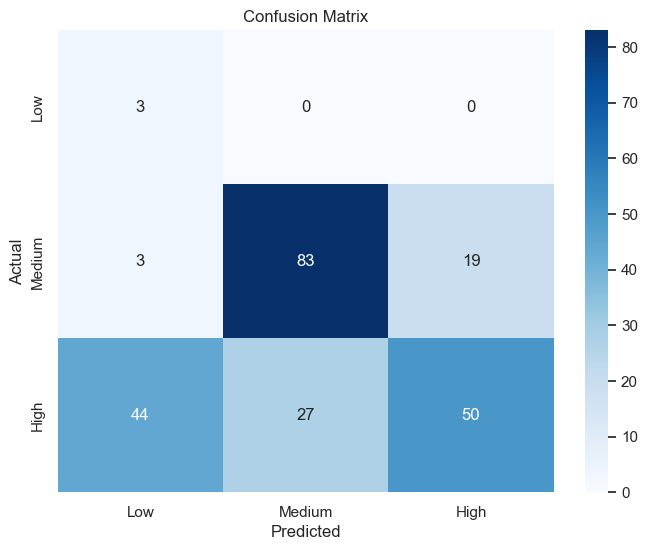

In [68]:
models = [
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    KNeighborsClassifier(),
    SVC(random_state=0),
    LogisticRegression(random_state=0),
]
models_comparison = {}

for model in models:
    print(f"Model: {str(model)}\n")
    model.fit(X_train_ov, y_train_ov)
    y_pred = model.predict(X_test)
    accuracies = cross_val_score(estimator=model, X=X_train_ov, y=y_train_ov, cv=5)
    
    # print LogisticRegression coefficients
    if isinstance(model, LogisticRegression):
        print("Coefficients: ", model.coef_)   
        print(model.classes_)
        coef_df = pd.DataFrame({'feature': X.columns, 'coefficient high': model.coef_[0], 'coefficient low': model.coef_[1], 'coefficient medium': model.coef_[2]})
        print(coef_df)
        
    print(classification_report(y_test, y_pred))
    print("Mean class accuracy: ", balanced_accuracy_score(y_pred, y_test))
    print("-" * 30, "\n")
    models_comparison[f"{str(model)}"] = [
        accuracy_score(y_pred, y_test),
        f1_score(y_pred, y_test, average="macro"),
        precision_score(y_pred, y_test, average="macro"),
        recall_score(y_pred, y_test, average="macro"),
        balanced_accuracy_score(y_pred, y_test),  
                (accuracies.mean()),
    ]
    # Create two sample Pandas Series representing actual and predicted values
    actual_values = pd.Series(y_test)
    predicted_values = pd.Series(y_pred)
    # Compute confusion matrix
    cm = confusion_matrix(actual_values, predicted_values)

    # Create a DataFrame from the confusion matrix
    labels = ['Low', 'Medium', 'High']  # Specify the labels for the confusion matrix
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)

    # Plot the confusion matrix using a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='d')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()




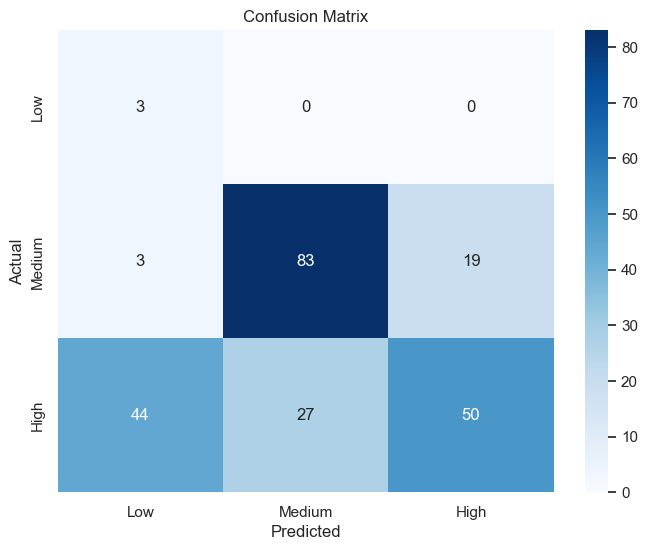

In [69]:
# Create two sample Pandas Series representing actual and predicted values
actual_values = pd.Series(y_test)
predicted_values = pd.Series(y_pred)
# Compute confusion matrix
cm = confusion_matrix(actual_values, predicted_values)

# Create a DataFrame from the confusion matrix
labels = ['Low', 'Medium', 'High']  # Specify the labels for the confusion matrix
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

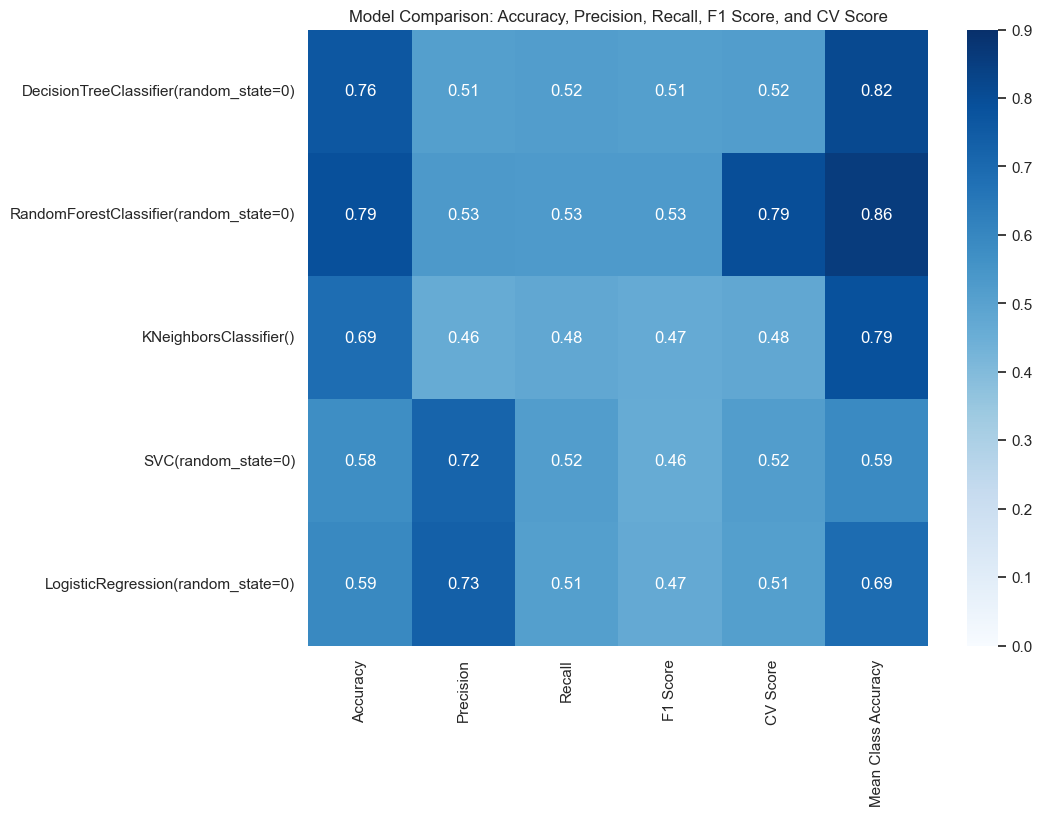

In [70]:
# create a dataframe from the models_comparison dictionary
metrics_df = pd.DataFrame.from_dict(models_comparison, orient='index', 
                            columns=['Accuracy', 'F1 Score', 'Precision', 'Recall', 'CV Score', 'Mean Class Accuracy'])

# create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(metrics_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'CV Score', 'Mean Class Accuracy']], annot=True, cmap='Blues', vmin=0, vmax=.9)
plt.title('Model Comparison: Accuracy, Precision, Recall, F1 Score, CV Score, and Mean Class Accuracy')
plt.show()


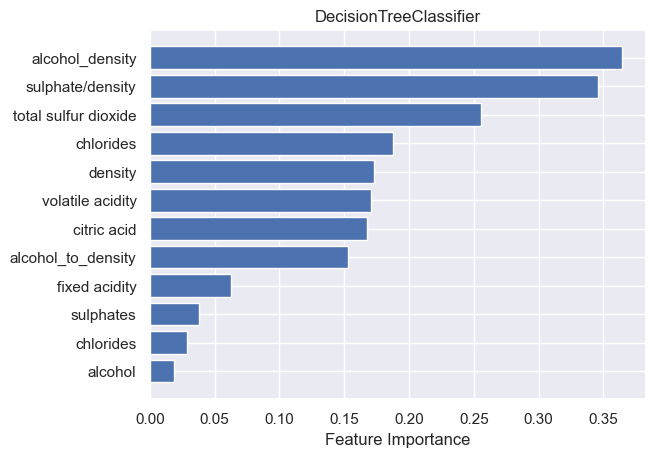

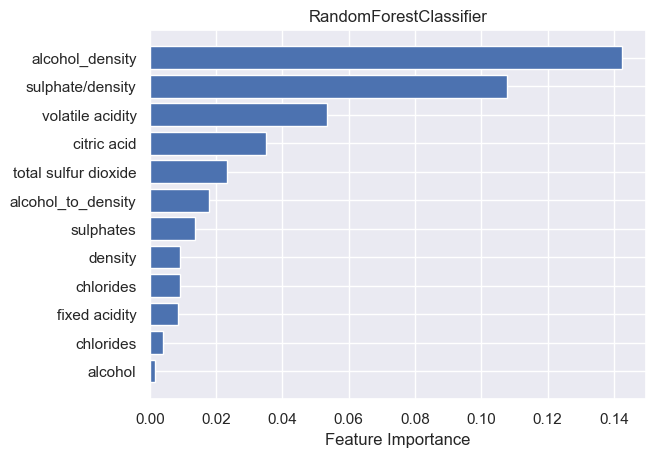

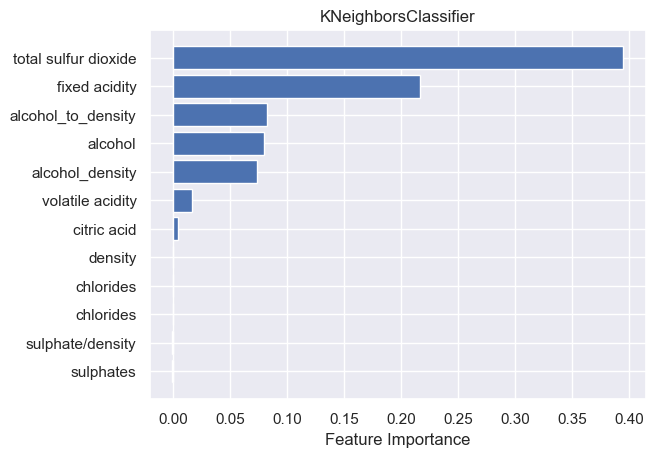

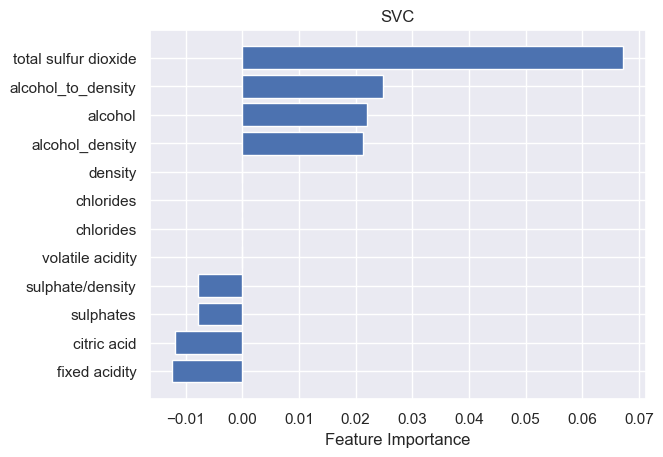

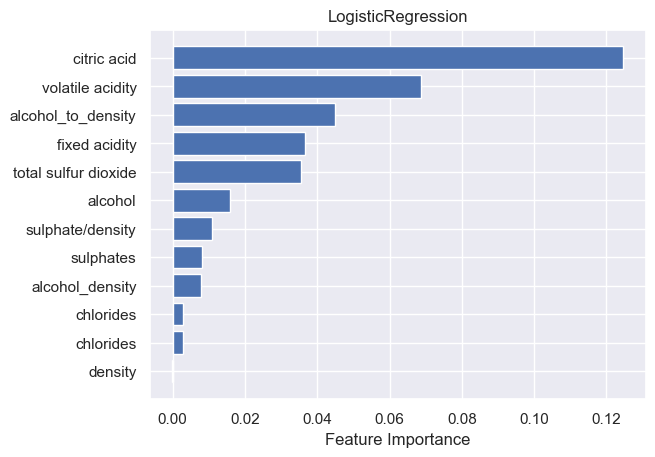

In [71]:
# Feature importance by model
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance
for model in models:
    model.fit(X_train_ov, y_train_ov)
    importance = permutation_importance(model, X_train_ov, y_train_ov, n_repeats=10, random_state=0)

    # Plot the feature importances
    sorted_idx = importance.importances_mean.argsort()
    plt.barh(range(X_train_ov.shape[1]), importance.importances_mean[sorted_idx])
    plt.yticks(range(X_train_ov.shape[1]), X_train_ov.columns[sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title(type(model).__name__)
    plt.show()